In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Challenges:

1. It is a long-text problem, the longest one has 39759 words.

2. It is an unbalanced problem, the most class has 8313 samples while the least class has 2369 samples.

3. it has 875129 distinct words while the most frequent one appears 5290340 times and the least frequent one only appear only once.

statistics:
875129 distinct words, 102277 sentences, around 400000 words apper once and 100000 apper twice
characters info can be found beblow.



data preprocessing and analyzing

In [ ]:
import pandas as pd
train = pd.read_csv("/content/drive/My Drive/train_set.csv",delimiter=',')
test = pd.read_csv("/content/drive/My Drive/test_set.csv",delimiter=',',nrows=10000)

In [ ]:
train.head()

id  ... class
0   0  ...    14
1   1  ...     3
2   2  ...    12
3   3  ...    13
4   4  ...    12

[5 rows x 4 columns]

In [ ]:
test.head()

id  ...                                           word_seg
0   0  ...  816903 565958 726082 764656 335008 75094 20282...
1   1  ...  729468 520477 529032 101368 335130 520477 1113...
2   2  ...  816903 816903 816903 816903 816903 816903 8169...
3   3  ...  231664 1033823 524850 330478 507199 520477 618...
4   4  ...  545370 379223 162767 520477 1194630 1197475 11...

[5 rows x 3 columns]

In [ ]:
train['word_length'] = train["word_seg"].map(lambda x: len(x.split(" ")) )

In [ ]:
train.head()

id                                            article  ... class  word_length
0   0  7368 1252069 365865 755561 1044285 129532 1053...  ...    14          627
1   1  581131 165432 7368 957317 1197553 570900 33659...  ...     3         3062
2   2  7368 87936 40494 490286 856005 641588 145611 1...  ...    12         1588
3   3  299237 760651 299237 887082 159592 556634 7489...  ...    13          467
4   4  7368 7368 7368 865510 7368 396966 995243 37685...  ...    12         1297

[5 rows x 5 columns]

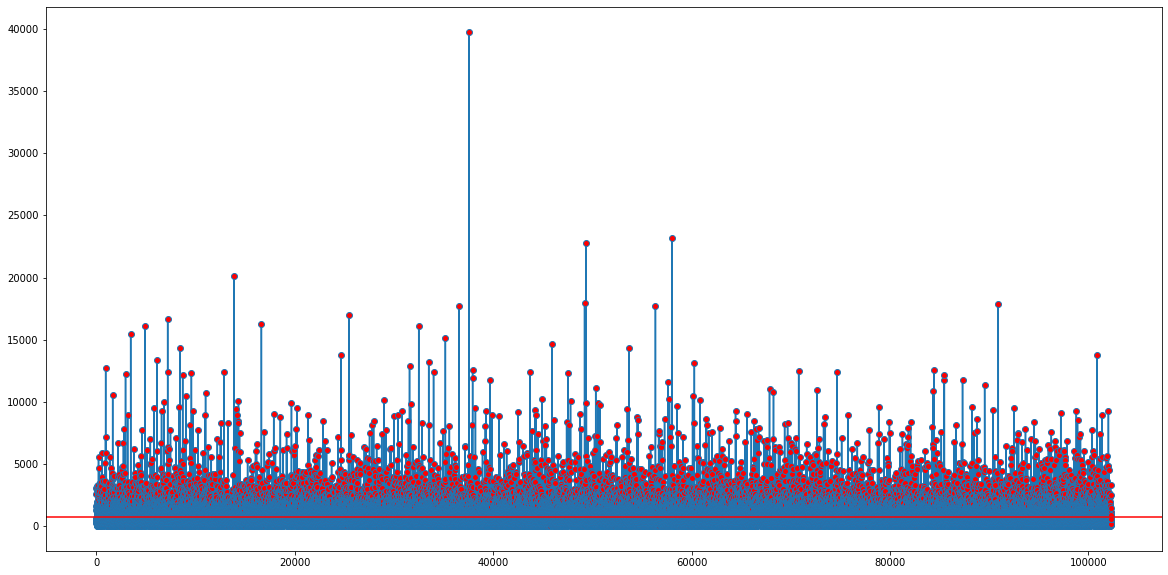

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
plt.plot(train['word_length'].tolist(),marker='o',markerfacecolor='red')
plt.axhline(y=np.mean(train['word_length'].tolist()),color="red")

In [ ]:
train[['word_length']].describe()

word_length
count  102277.000000
mean      716.954604
std       801.804540
min         6.000000
25%       305.000000
50%       514.000000
75%       862.000000
max     39759.000000

In [ ]:
train['char_length'] = train["article"].map(lambda x: len(x.split(" ")) )

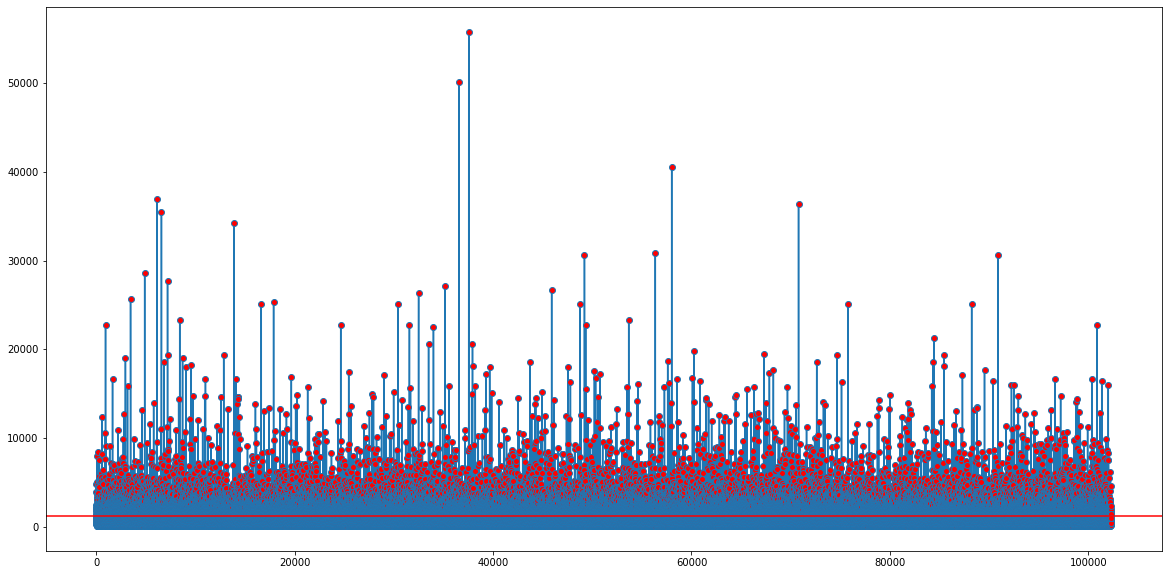

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
plt.plot(train['char_length'].tolist(),marker='o',markerfacecolor='red')
plt.axhline(y=np.mean(train['char_length'].tolist()),color="red")

In [ ]:
train[['char_length']].describe()

char_length
count  102277.000000
mean     1177.100159
std      1348.431565
min        50.000000
25%       497.000000
50%       842.000000
75%      1408.000000
max     55804.000000

In [ ]:
train_word_list = []
for line in train['word_seg'].to_list():
  w = line.split(" ")
  train_word_list.extend(w)

In [ ]:
from collections import Counter

In [ ]:
count_word = pd.Series(Counter(train_word_list)).sort_values(ascending=False)

In [ ]:
count_word.head()

520477     5290340
816903     4063036
1033823    3358597
995362     2025883
920327     1028550
dtype: int64

In [ ]:
count_word.count()

875129

In [ ]:
count_word.head(10)

520477     5290340
816903     4063036
1033823    3358597
995362     2025883
920327     1028550
834740      721943
460600      669308
54111       646855
1226448     533532
1025743     421777
dtype: int64

In [ ]:
count_word[count_word<3].count()

529805

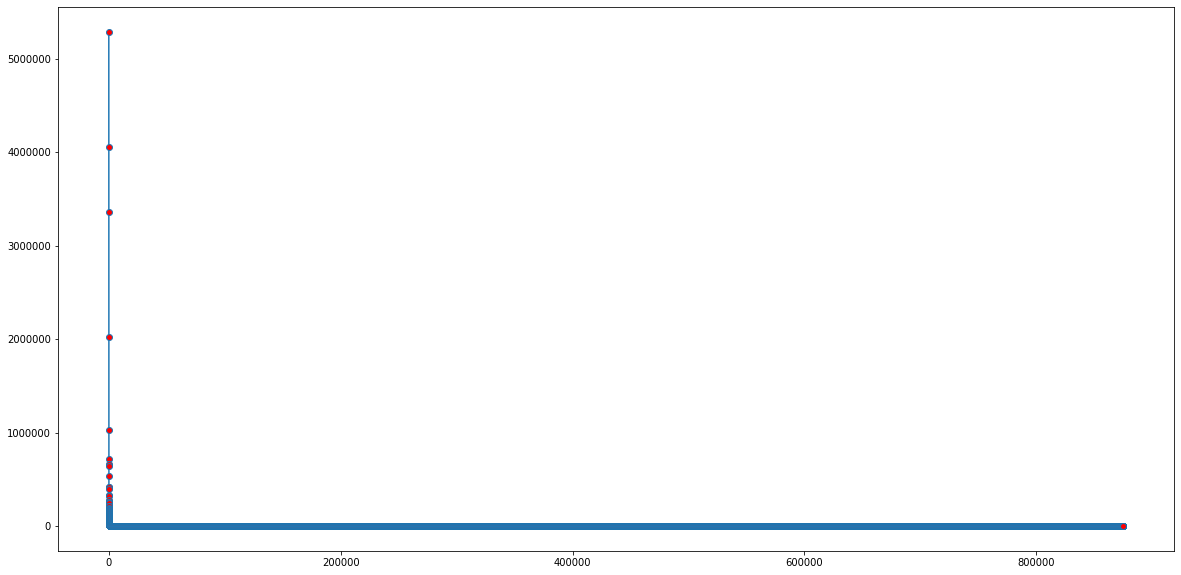

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
plt.plot(count_word.tolist(),marker='o',markerfacecolor='red')


Text(0.5, 1.0, 'Frequency of Word <100')

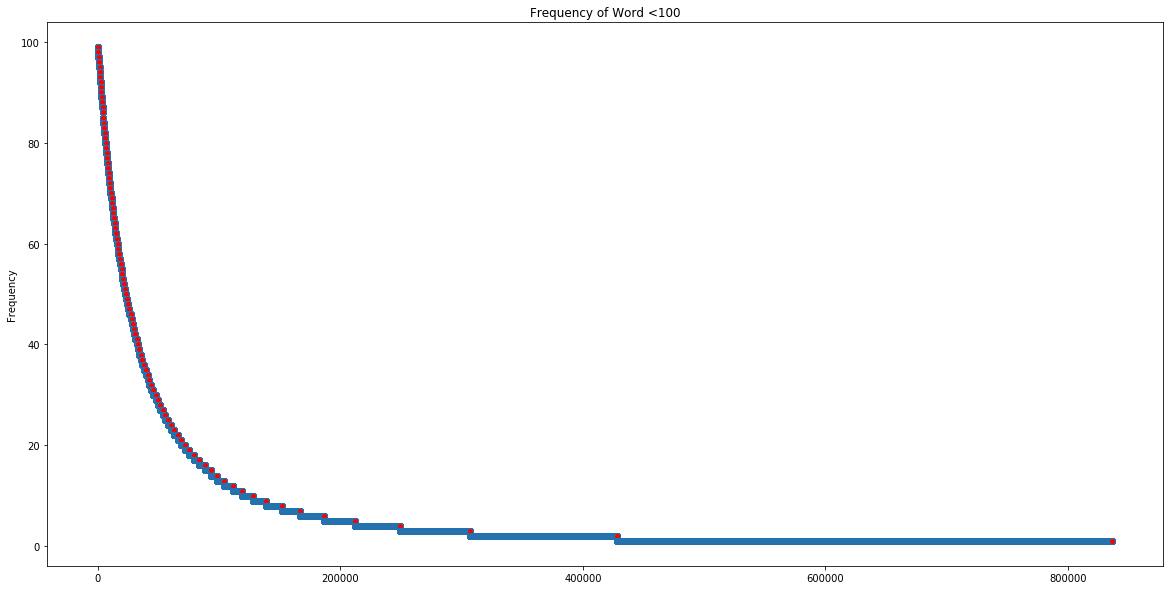

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
plt.plot(count_word[count_word<100].tolist(),marker='o',markerfacecolor='red')
plt.ylabel("Frequency")
plt.title("Frequency of Word <100")

In [ ]:
train_char_list = []
for line in train['article'].to_list():
  w = line.split(" ")
  train_char_list.extend(w)

In [ ]:
count_char = pd.Series(Counter(train_char_list)).sort_values(ascending=False)

In [ ]:
count_char.count()

13516

In [ ]:
count_char.head(20)

1044285    5290340
7368       4063036
856005     3437550
72195      2025883
195449     1249736
359838     1179852
239755     1028550
427848      950408
316564      853835
1077049     847268
7792        818752
837240      798884
581131      650586
1030656     616991
1220011     583008
968221      553471
79747       533532
266913      527138
474675      526307
222667      497632
dtype: int64

In [ ]:
count_char.tail(10)

1192398    1
353297     1
596510     1
1218481    1
803814     1
457423     1
937025     1
981236     1
888075     1
61436      1
dtype: int64

Text(0.5, 1.0, 'Frequency of Char <100')

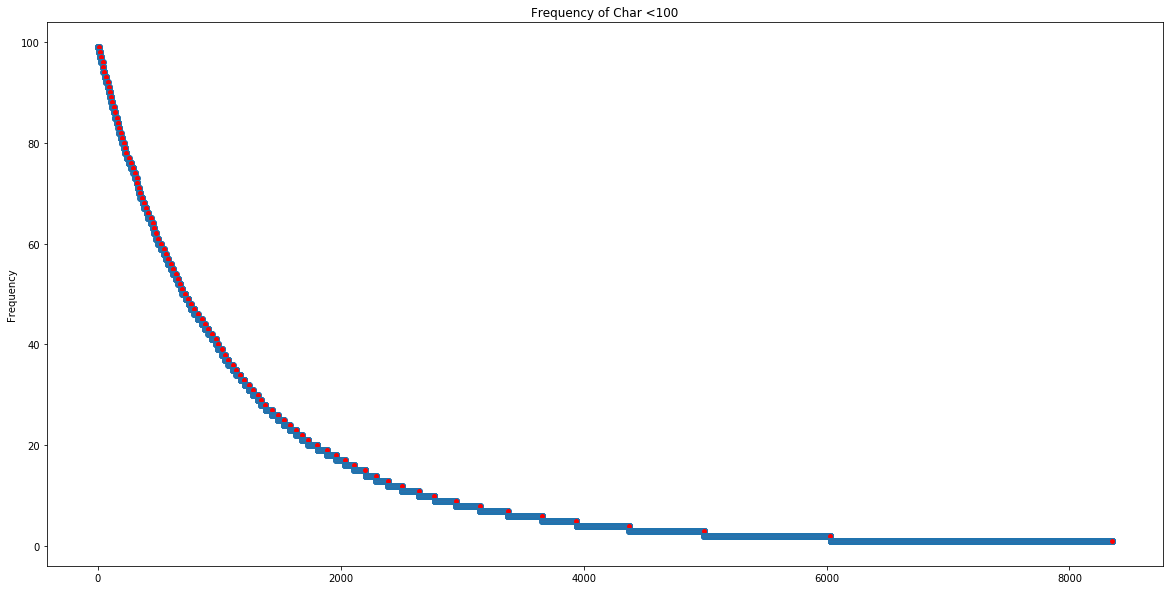

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
plt.plot(count_char[count_char<100].tolist(),marker='o',markerfacecolor='red')
plt.ylabel("Frequency")
plt.title("Frequency of Char <100")

In [ ]:
count_class = train['class'].value_counts()

In [ ]:
count_class

3     8313
13    7907
9     7675
15    7511
18    7066
8     6972
6     6888
14    6740
19    5524
1     5375
12    5326
10    4963
4     3824
11    3571
16    3220
17    3094
7     3038
2     2901
5     2369
Name: class, dtype: int64

Text(0.5, 0, 'class')

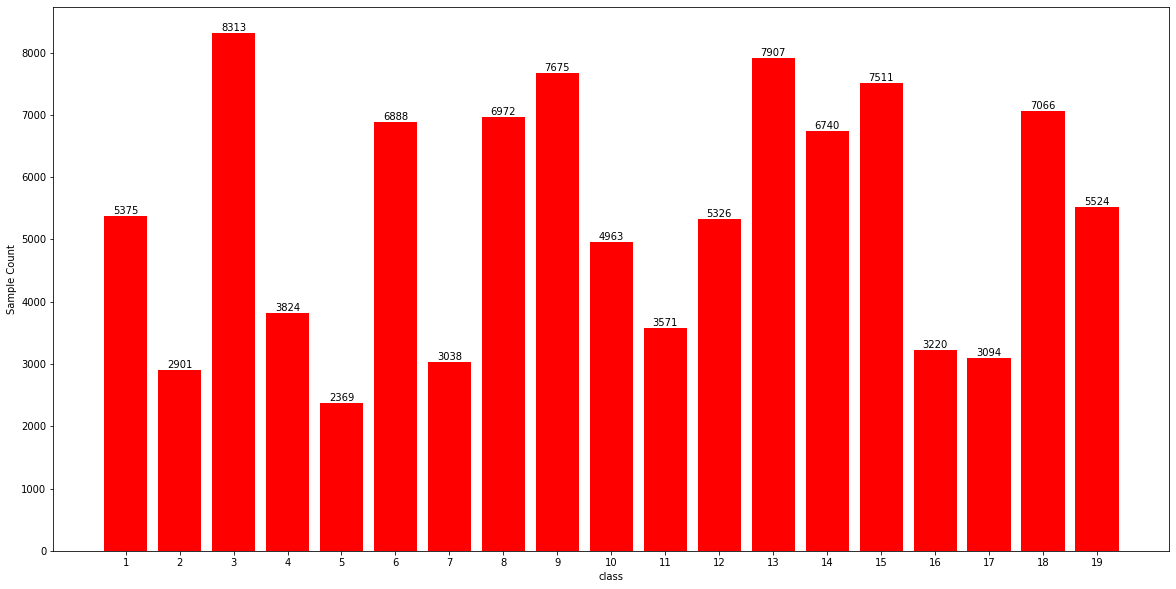

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
class_bar = plt.bar(x=count_class.index, height=count_class.tolist(),width=0.8,color='red')
# plt.ylabel("Frequency")
# plt.title("Frequency of Char <100")
for bar in class_bar:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height+1, str(height), ha="center", va="bottom")
plt.xticks(count_class.index)
plt.ylabel("Sample Count")
plt.xlabel("class")

# BASELINE LOGISTIC REGRESSION + LIGHTGBM

TF-IDF: word_char level

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
word_vec = TfidfVectorizer(analyzer='word',
            ngram_range=(1,2),
            min_df=3, 
            max_df=0.9,
            use_idf=True,
            smooth_idf=True, 
            sublinear_tf=True)
train_term_doc = word_vec.fit_transform(train['word_seg'])
test_term_doc = word_vec.transform(test['word_seg'])

In [ ]:
char_vec = TfidfVectorizer(analyzer='word', 
            ngram_range=(1,2), #(1,3)
            min_df=3, 
            max_df=0.9,
            use_idf=True,
            smooth_idf=True, 
            sublinear_tf=True)
train_term_char = char_vec.fit_transform(train['article'])
test_term_char = char_vec.transform(test['article'])

In [ ]:
from scipy.sparse import hstack
train_term_doc = hstack([train_term_doc, train_term_char])
test_term_doc = hstack([test_term_doc, test_term_char])

In [ ]:
# generate label and splite data
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train['label'] = lb.fit_transform(train['class'].tolist())
from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval  = train_test_split(train_term_doc,train['label'],test_size=0.2,shuffle=True,random_state=2019)


In [ ]:
# for logistic regression, we do not need k-fold mode, use splite directly
# import numpy as np
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=10, shuffle=True, random_state=666)
# train_matrix = np.zeros((train.shape[0],19)) # save kfold intermediate results
# test_pre_matrix = np.zeros((10,test.shape[0],19)) # save test results
# cv_scores=[] 

# from sklearn.model_selection import train_test_split
# X_train, X_eval, y_train, y_eval  = train_test_split(train_term_doc,train['label'],test_size=0.2,shuffle=True,random_state=2019)
# # tuning parameters
# from sklearn.linear_model import LogisticRegression
# for i,(train_index,eval_index) in enumerate(kf.split(train_term_doc)):
#     print(len(train_index),len(eval_index))
    
#     X_train = train_term_doc.tocsr()[train_index]
#     y_train = train['label'][train_index]

#     X_eval = train_term_doc.tocsr()[eval_index]
#     y_eval = train['label'][eval_index]
    
#     model = LogisticRegression(C=4, dual=True,solver= 'liblinear') 
#     model.fit(X_train,y_train)
    
#     eval_prob = model.predict_proba(X_eval)
#     train_matrix[eval_index] = eval_prob.reshape((X_eval.shape[0], 19))#array
    
#     eval_pred = np.argmax(eval_prob,axis=1)
#     eval_pred = lb.inverse_transform(eval_pred)
#     score = cal_macro_f1(lb.inverse_transform(y_eval),eval_pred)
#     cv_scores.append(score)
#     print("validation score is",score)
    
#     test_prob = model.predict_proba(test_term_doc)
#     test_pre_matrix[i,:,:] = test_prob.reshape((test_term_doc.shape[0], 19))
#validation
# all_pred = np.argmax(train_matrix,axis=1)
# all_pred = lb.inverse_transform(all_pred)
# score = cal_macro_f1(lb.inverse_transform(train['label']),all_pred)
# print("all validation score is",score)
# test_pred = test_pre_matrix.mean(axis=0)


In [ ]:
from sklearn.metrics import f1_score
def cal_macro_f1(y_true,y_pred):
    score = f1_score(y_true,y_pred,average='macro')
    return score

linear regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
clf = LogisticRegression( C=8, dual=True, solver= 'liblinear') 
clf.fit(X_train,y_train)
X_prob = np.argmax(clf.predict_proba(X_eval), -1)
fScore = cal_macro_f1(y_eval, X_prob)
print(fScore)
# C=4, dual=True, solver= 'liblinear' ----- 0.771
# C=8, dual=True, solver= 'liblinear' ----- 0.771
test_prob = clf.predict_proba(test_term_doc)
test_pred = np.argmax(test_prob,axis=1)
test['class'] = lb.inverse_transform(test_pred)
test[["id","class"]].to_csv("/content/drive/My Drive/logisticRegression.csv",index=False,header=True,encoding='utf-8')
np.save("/content/drive/My Drive/logisticRegression_test_result.npy",test_prob)



0.7713040501666257


lightGBM

In [ ]:
#tuning parameters
"""
parameters = {
    "colsample_bytree" : [0.6, 0.8, 1],
    "subsample" : [0.7, 0.8, 0.9],
    'reg_lambda': [6,10],
    'reg_alpha': [0.001,0.005],
     'max_depth': [6,  10],
    'num_leaves': [40,  60],
    'min_child_samples': [15,30],
    'min_child_weight': [0.001,0.002]   
}

model = lgb.LGBMClassifier( boosting_type='gbdt',
                            num_leaves=60,
                            max_depth=10,
                            learning_rate= 0.1,
                            n_estimators=200,
                            objective='multiclass',
                            subsample =0.8,  # bagging_fraction
                            reg_lambda=6,#l2
                            reg_alpha=0.005,
                            n_jobs=16, #
                            num_class=19,#
                            silent=True,
                            random_state=2019,
                            colsample_bytree=0.6,  #feature_fraction
                            min_child_samples= 15,
                            min_child_weight=0.001,#1.5,
                            metric='multi_logloss',
                            cat_smooth = 0,
                            device='gpu'
                           )
gsearch = GridSearchCV(model, param_grid=parameters, scoring='f1_macro', cv=3)
gsearch.fit(X_train, y_train)
# model.fit(X_train, y_train, eval_set=(X_eval, y_eval), early_stopping_rounds=200)
print(gsearch.best_params_)
print(gsearch.best_score_)
# print(gsearch.cv_results_['mean_test_score'])
# print(gsearch.cv_results_['params'])
"""

In [ ]:
!pip install lightgbm
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

model = lgb.LGBMClassifier( boosting_type='gbdt',
                            num_leaves=60,
                            max_depth=10,
                            learning_rate= 0.1,
                            n_estimators=200,
                            objective='multiclass',
                            subsample =0.8,  # bagging_fraction
                            reg_lambda=6,#l2
                            reg_alpha=0.005,
                            n_jobs=16, #
                            num_class=19,#
                            silent=True,
                            random_state=2019,
                            colsample_bytree=0.6,  #feature_fraction
                            min_child_samples= 15,
                            min_child_weight=0.001,#1.5,
                            metric='multi_logloss',
                            cat_smooth = 0,
                            device='gpu'
                           )

model.fit(X_train,y_train,eval_set=(X_eval,y_eval), early_stopping_rounds=100)
eval_prob = model.predict_proba(X_eval) 
eval_pred = np.argmax(eval_prob,axis=1)
score = cal_macro_f1(y_eval,eval_pred)
print("validation score is",score)

In [ ]:
test_prob = model.predict_proba(test_term_doc)
test_pred = np.argmax(test_prob,axis=1)
test['class'] = lb.inverse_transform(test_pred)
test[["id","class"]].to_csv("/content/drive/My Drive/logisticRegression.csv",index=False,header=True,encoding='utf-8')
np.save("/content/drive/My Drive/lightGBM_test_result.npy",test_prob)


Word2Vec

In [ ]:
!pip install gensim
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from gensim.models import Word2Vec
from tensorflow.keras.layers import (Bidirectional,
                                     Embedding,
                                     GRU, 
                                     GlobalAveragePooling1D,
                                     GlobalMaxPooling1D,
                                     Concatenate,
                                     SpatialDropout1D,
                                     BatchNormalization,
                                     Dropout,
                                     Dense,
                                     Activation,
                                     concatenate,
                                     Input
                                    )
tf.config.set_soft_device_placement(True)
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [ ]:
# tokenize text
"""
paramters need to be tunned
"""
NUM_WORDS = 50000 # 1E5
COVER_RANGE =  95
CUSTOMER_LENGTH = 1800 # 5000

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=NUM_WORDS, 
                                                  lower=False,filters="")
tokenizer.fit_on_texts(train['word_seg'].tolist()+test['word_seg'].tolist())
train_ = tokenizer.texts_to_sequences(train['word_seg'].values)
test_ = tokenizer.texts_to_sequences(test['word_seg'].values)

In [ ]:
#padding and truncating & build voc
max_length = int(np.percentile(list(map(lambda x: len(x),train_)),COVER_RANGE))
train_ = tf.keras.preprocessing.sequence.pad_sequences(train_, maxlen=max(max_length,CUSTOMER_LENGTH),
                                                      padding='pre',truncating='pre',value=0.0)
test_ = tf.keras.preprocessing.sequence.pad_sequences(test_, maxlen=max(max_length,CUSTOMER_LENGTH),
                                                     padding='pre',truncating='pre',value=0.0)
word_vocab = tokenizer.word_index
del tokenizer

In [ ]:
len(train_[0])

1861

In [ ]:
#generate labels
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
lb = LabelEncoder()
train_label = lb.fit_transform(train['class'].values)
train_label = to_categorical(train_label)
del lb

In [ ]:
file_name = "/content/drive/My Drive/w2c.model"
if not os.path.exists(file_name):
  # train word2vec model
  """
  paramters need to be tunned
  """
  MIN_COUNT=2
  NEGATIVE = 8
  SG = 1
  ITER = 5
  HS = 0

  all_data=pd.concat([train['word_seg'],test['word_seg']])
  model = Word2Vec([document.split(' ')for document in all_data.values],
                    size=200, 
                    window=5,
                    iter=ITER, 
                    workers=11, 
                    seed=2018, 
                    min_count=MIN_COUNT,
                  negative = NEGATIVE,
                  sg=SG,
                  hs = HS
                  )

  model.save(file_name)
else:
  model = Word2Vec.load(file_name)


In [ ]:
#after training the model, let's build the embeding matrix
count = 0
embedding_matrix = np.zeros((len(word_vocab) + 1, 200))
for word, i in word_vocab.items():
    embedding_vector = model.wv[word] if word in model else None
    if embedding_vector is not None:
        count += 1
        embedding_matrix[i] = embedding_vector
    else:
        unk_vec = np.random.random(200) * 0.5
        unk_vec = unk_vec - unk_vec.mean()
        embedding_matrix[i] = unk_vec
print("hitting rate:", count / len(word_vocab))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  """


hitting rate: 0.5333221026089697


In [ ]:
#build rnn model
def build_model(sent_length, embeddings_weight,class_num):
    content = Input(shape=(sent_length,), dtype='int32')
    embedding = Embedding(
        name="word_embedding",
        input_dim=embeddings_weight.shape[0],
        weights=[embeddings_weight],
        output_dim=embeddings_weight.shape[1],
        trainable=False)

    x = SpatialDropout1D(0.2)(embedding(content))

    x = Bidirectional(GRU(200, return_sequences=True))(x)
    x = Bidirectional(GRU(200, return_sequences=True))(x)

    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)

    conc = concatenate([avg_pool, max_pool])
    
    x = Dense(1000)(conc)
    x = BatchNormalization()(x)
    x = Activation(activation="relu")(x)
    x = Dropout(0.2)(x)
    x = Dense(500)(x)
    x = BatchNormalization()(x)
    x = Activation(activation="relu")(x)
    output = Dense(19, activation="softmax")(x)

    model = tf.keras.models.Model(inputs=content, outputs=output)
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

In [ ]:
#model = build_model(2756, embedding_matrix,19)
#model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2756)]       0                                            
__________________________________________________________________________________________________
word_embedding (Embedding)      (None, 2756, 200)    184019200   input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 2756, 200)    0           word_embedding[0][0]             
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 2756, 400)    482400      spatial_dropout1d[0][0]          
______________________________________________________________________________________________

In [ ]:
#train model
import gc
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
kf = KFold(n_splits=5, shuffle=True, random_state=666)
train_pre_matrix = np.zeros((train.shape[0],19)) # for saving results
test_pre_matrix = np.zeros((10,test.shape[0],19)) # for saving results
test_ds = tf.data.Dataset.from_tensor_slices((test_,np.zeros((test_.shape[0],19)))).batch(128)

with tf.device("/gpu:0"):
  for i, (train_fold, test_fold) in enumerate(kf.split(train_)):
      print("%sth folder"%i)
      X_train, X_valid = train_[train_fold, :], train_[test_fold, :]
      y_train, y_valid = train_label[train_fold], train_label[test_fold]
      train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(64)
      val_ds = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).batch(128)
      checkpoint_dir = '/content/drive/My Drive/gru2_checkpoints/cv_'+str(i)+'/'
      checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")
      model = build_model(1861, embedding_matrix,19)


      early_stopping = EarlyStopping(monitor='val_accuracy', patience=6)
      plateau = ReduceLROnPlateau(monitor="val_accuracy", 
                                  verbose=1, 
                                  mode='max', 
                                  factor=0.1, 
                                  patience=3)
      checkpoint = ModelCheckpoint(checkpoint_prefix, 
                                  monitor='val_accuracy',
                                  verbose=2, 
                                  save_best_only=True,
                                  mode='max',
                                  save_weights_only=True)
      if not os.path.exists(checkpoint_dir):
        model.fit(train_ds,
                  epochs=30,
                  validation_data=val_ds,
                  callbacks=[early_stopping, plateau, checkpoint],
                  verbose=2)
        #validattion and save csv
        model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
        valid_prob = model.predict(val_ds)
        valid_pred = np.argmax(valid_prob,axis=1)
        y_valid = np.argmax(y_valid, axis=1)
        f1_score_ = f1_score(y_valid,valid_pred,average='macro') 
        print ("valid's f1-score: %s" %f1_score_)

        #save results
        train_pre_matrix[test_fold, :] =  valid_prob
        test_pre_matrix[i, :,:]= model.predict(test_ds)

        #prepare the next roll
        del model; gc.collect()
        tf.keras.backend.clear_session() 
        np.save("/content/drive/My Drive/gru" +str(i)+"test_result.npy",test_pre_matrix)





In [ ]:
np.save("/content/drive/My Drive/gru_test_result.npy",test_pre_matrix) # only the first complete

In [ ]:
#model fusion
res = np.load("/content/drive/My Drive/gru_test_result.npy") 
res_mean = res.mean(axis=0)
test_pred = lb.inverse_transform(np.argmax(res_mean,axis=1))
test['class'] = test_pred
test[["id","class"]].to_csv("/content/drive/My Drive/bigru_prob_fusion.csv",index=False,header=True,encoding='utf-8')

In [ ]:
# #voting
# res = np.load("cv_test_result.npy")
# test_pred_matrix = np.zeros((test.shape[0],10),dtype=int)
# for i in range(10):
#     sub_res = res[i,:,:]
#     sub_test_pred = lb.inverse_transform(np.argmax(sub_res,axis=1))
#     test_pred_matrix[:,i]=sub_test_pred
# test_pred=[]
# for line in test_pred_matrix:
#     test_pred.append(np.argmax(np.bincount(line)))
# test['class'] = test_pred
# test[["id","class"]].to_csv("submission_baseline_dnn_cv_v2.csv",index=False,header=True,encoding='utf-8')

Using Capsule Network to do feature fusion, and tuning the hyperparameters


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import gc
from gensim.models import Word2Vec
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Layer

from sklearn.model_selection import KFold
from sklearn.metrics import f1_score


!pip install gensim
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from gensim.models import Word2Vec
from tensorflow.keras.layers import (Bidirectional,
                                     Embedding,
                                     GRU, 
                                     GlobalAveragePooling1D,
                                     GlobalMaxPooling1D,
                                     Concatenate,
                                     SpatialDropout1D,
                                     BatchNormalization,
                                     Dropout,
                                     Dense,
                                     Activation,
                                     concatenate,
                                     Input
                                    )
tf.config.set_soft_device_placement(True)
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [ ]:
#process the dataset, padding and truncating/ and word vocab
"""
parameters need to be tunned
"""
NUM_WORDS = 50000
MAXLEN = 1800
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=NUM_WORDS, lower=False,filters="")
tokenizer.fit_on_texts(list(train['word_seg'].values)+list(test['word_seg'].values))

train_ = tokenizer.texts_to_sequences(train['word_seg'].values)
test_ = tokenizer.texts_to_sequences(test['word_seg'].values)

train_ = tf.keras.preprocessing.sequence.pad_sequences(train_, maxlen=MAXLEN)
test_ = tf.keras.preprocessing.sequence.pad_sequences(test_, maxlen=MAXLEN)

word_vocab = tokenizer.word_index




In [ ]:

# prepare embeding matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
lb = LabelEncoder()
train_label = lb.fit_transform(train['class'].values)
train_label = to_categorical(train_label)


vector_size =200
all_data=pd.concat([train['word_seg'],test['word_seg']])
file_name = "/content/drive/My Drive/w2c5.model"
if not os.path.exists(file_name):
  # train word2vec model

  model = Word2Vec([[word for word in document.split(' ')] for document in all_data.values],
                     size=vector_size, window=5, iter=10, workers=11, seed=2018, min_count=2)
  model.save(file_name)
else:
  model = Word2Vec.load(file_name) 



file_name2 = "/content/drive/My Drive/w2c10.model"
if not os.path.exists(file_name2):

  model2 = Word2Vec([[word for word in document.split(' ')] for document in all_data.values],
                     size=vector_size, window=10, iter=10, workers=11, seed=2018, min_count=2)
  model2.save(file_name2)
else:
  model2 = Word2Vec.load(file_name2) 


glove_model = {}
with open("/content/drive/My Drive/glove_vectors_char.txt",encoding='utf-8') as f:
    for line in f:
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        glove_model[word] = coefs
print("add glove finished....")  





embedding_word2vec_matrix = np.zeros((len(word_vocab) + 1, vector_size))
for word, i in word_vocab.items():
    embedding_vector = model[word] if word in model else None
    if embedding_vector is not None:
        embedding_word2vec_matrix[i] = embedding_vector
    else:
        unk_vec = np.random.random(vector_size) * 0.5
        unk_vec = unk_vec - unk_vec.mean()
        embedding_word2vec_matrix[i] = unk_vec

embedding_word2vec_matrix2 = np.zeros((len(word_vocab) + 1, vector_size))
for word, i in word_vocab.items():
    embedding_vector = model2[word] if word in model2 else None
    if embedding_vector is not None:
        embedding_word2vec_matrix2[i] = embedding_vector
    else:
        unk_vec = np.random.random(vector_size) * 0.5
        unk_vec = unk_vec - unk_vec.mean()
        embedding_word2vec_matrix2[i] = unk_vec

glove_count=0
embedding_glove_matrix = np.zeros((len(word_vocab) + 1, vector_size))
for word, i in word_vocab.items():
    embedding_glove_vector=glove_model[word] if word in glove_model else None
    if embedding_glove_vector is not None:
        embedding_glove_matrix[i] = embedding_glove_vector
    else:
        unk_vec = np.random.random(vector_size) * 0.5
        unk_vec = unk_vec - unk_vec.mean()
        embedding_glove_matrix[i] = unk_vec

embedding_matrix=np.concatenate((embedding_word2vec_matrix,embedding_word2vec_matrix2,embedding_glove_matrix),axis=1)
del train, test, model, model2, glove_model, tokenizer, all_data, embedding_word2vec_matrix, embedding_word2vec_matrix2, embedding_glove_matrix, word_vocab

add glove finished....


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [ ]:
# capsule model
from tensorflow.keras.layers import Layer
"""
parameters need to be tunned
"""
Num_capsule=10
Dim_capsule=16
Routings=3


def squash(x, axis=-1):
    s_squared_norm = tf.keras.backend.sum(tf.keras.backend.square(x), axis, keepdims=True)
    scale = tf.keras.backend.sqrt(s_squared_norm + tf.keras.backend.epsilon())
    return x / scale


class Capsule(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, kernel_size=(9, 1), share_weights=True,
                 activation='default', **kwargs):
        super(Capsule, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings
        self.kernel_size = kernel_size
        self.share_weights = share_weights
        if activation == 'default':
            self.activation = squash
        else:
            self.activation = Activation(activation)

    def build(self, input_shape):
        super(Capsule, self).build(input_shape)
        input_dim_capsule = input_shape[-1]
        if self.share_weights:
            self.W = self.add_weight(name='capsule_kernel',
                                     shape=(1, input_dim_capsule,
                                            self.num_capsule * self.dim_capsule),
                                     initializer='glorot_uniform',
                                     trainable=True)
        else:
            input_num_capsule = input_shape[-2]
            self.W = self.add_weight(name='capsule_kernel',
                                     shape=(input_num_capsule,
                                            input_dim_capsule,
                                            self.num_capsule * self.dim_capsule),
                                     initializer='glorot_uniform',
                                     trainable=True)
    def call(self, u_vecs):
        if self.share_weights:
            u_hat_vecs = tf.keras.backend.conv1d(u_vecs, kernel=self.W)
        else:
            u_hat_vecs = tf.keras.backend.local_conv1d(u_vecs, kernel=self.W, kernel_size=[1], strides=[1])

        batch_size = tf.shape(u_vecs)[0]
        input_num_capsule = tf.shape(u_vecs)[1]
        u_hat_vecs = tf.reshape(u_hat_vecs, [batch_size, input_num_capsule,self.num_capsule, self.dim_capsule])
        u_hat_vecs = tf.transpose(u_hat_vecs,perm=[0, 2, 1, 3])# final u_hat_vecs.shape = [None, num_capsule, input_num_capsule, dim_capsule]
        """
        todo, change u_hat_vecs --> stop gradient
        """
        u_hat_vecs_copy = tf.stop_gradient(u_hat_vecs)
        
 
        b = tf.zeros_like(u_hat_vecs[:, :, :, 0])  # shape = [None, num_capsule, input_num_capsule]
        for i in range(self.routings):
            b = tf.transpose(b, perm=[0, 2, 1])  # shape = [None, input_num_capsule, num_capsule] 
            c = tf.nn.softmax(b) # shape = [None, input_num_capsule, num_capsule] 
            c = tf.transpose(c, perm=[0, 2, 1])  # shape = [None, num_capsule, input_num_capsule] 
            s_j = tf.reduce_sum(tf.multiply(tf.expand_dims(c,axis=3) , u_hat_vecs_copy) , axis=2)        
            outputs = self.activation(s_j) #[None,num_capsule,dim_capsule]
    
            if i < self.routings - 1:
                b = tf.reduce_sum(tf.multiply(tf.expand_dims(outputs,axis=2) , u_hat_vecs_copy) , axis=3)
   
        b = tf.transpose(b, perm=[0, 2, 1])  # shape = [None, input_num_capsule, num_capsule] 
        c = tf.nn.softmax(b) # shape = [None, input_num_capsule, num_capsule] 
        #c = tf.transpose(c, perm=[0, 2, 1])  # shape = [None, num_capsule, input_num_capsule] 
        #print(c.shape, tf.expand_dims(c,axis=3).shape, u_hat_vecs.shape)
        s_j = tf.reduce_sum(tf.multiply(tf.expand_dims(c,axis=3) , u_hat_vecs) , axis=2)        
        outputs = self.activation(s_j) #[None,num_capsule,dim_capsule]
 
        return outputs

    def compute_output_shape(self, input_shape):
        return (None, self.num_capsule, self.dim_capsule)

    

In [ ]:
# build model
def Gru_Capsule_Model(sent_length, embeddings_weight,class_num):
    content = Input(shape=(sent_length,), dtype='int32')
    embedding = Embedding(
        name="word_embedding",
        input_dim=embeddings_weight.shape[0],
        weights=[embeddings_weight],
        output_dim=embeddings_weight.shape[1],
        trainable=False)
    embed = SpatialDropout1D(0.3)(embedding(content))

    x = Bidirectional(GRU(200, return_sequences=True))(embed)
    x = Bidirectional(GRU(200, return_sequences=True))(x)
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    capsule = Capsule(num_capsule=Num_capsule, dim_capsule=Dim_capsule, routings=Routings, share_weights=True)(x)
    capsule = Flatten()(capsule)  
    avg_pool = Flatten()(avg_pool) 
    max_pool = Flatten()(max_pool) 

    capsule = concatenate([capsule, avg_pool, max_pool])
    capsule = Flatten()(capsule)
    

    x = Dense(1000)(capsule)
    x = BatchNormalization()(x)
    x = Activation(activation="relu")(x)
    x = Dropout(0.3)(x)
    x = Dense(500)(x)
    x = BatchNormalization()(x)
    x = Activation(activation="relu")(x)
    output = Dense(class_num, activation="softmax")(x)
    model = Model(inputs=content, outputs=output)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
len(train_[0])

In [ ]:
#train model
import gc
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
kf = KFold(n_splits=10, shuffle=True, random_state=999)
#train_pre_matrix = np.zeros((train_.shape[0],19)) # for saving results
#test_pre_matrix = np.zeros((10,test_.shape[0],19)) # for saving results
test_ds = tf.data.Dataset.from_tensor_slices((test_,np.zeros((test_.shape[0],19)))).batch(128)

with tf.device("/gpu:0"):
  for i, (train_fold, test_fold) in enumerate(kf.split(train_)):
      print("%sth folder"%i)
      X_train, X_valid = train_[train_fold, :], train_[test_fold, :]
      y_train, y_valid = train_label[train_fold], train_label[test_fold]
      train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(64)
      val_ds = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).batch(128)
      checkpoint_dir = '/content/drive/My Drive/gru_capsule_checkpoints/cv_'+str(i)+'/'
      checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")
      model = Gru_Capsule_Model(1800, embedding_matrix,19)


      early_stopping = EarlyStopping(monitor='val_accuracy', patience=6)
      plateau = ReduceLROnPlateau(monitor="val_accuracy", 
                                  verbose=2, 
                                  mode='max', 
                                  factor=0.5, 
                                  patience=3)
      checkpoint = ModelCheckpoint(checkpoint_prefix, 
                                  monitor='val_accuracy',
                                  verbose=2, 
                                  save_best_only=True,
                                  mode='max',
                                  save_weights_only=True)
      if not os.path.exists(checkpoint_dir):
        model.fit(train_ds,
                  epochs=30,
                  validation_data=val_ds,
                  callbacks=[early_stopping, plateau, checkpoint],
                  verbose=2)
        #validattion and save csv
        model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
        valid_prob = model.predict(val_ds)
        valid_pred = np.argmax(valid_prob,axis=1)
        y_valid = np.argmax(y_valid, axis=1)
        f1_score_ = f1_score(y_valid,valid_pred,average='macro') 
        print ("valid's f1-score: %s" %f1_score_)

        #save results
        #train_pre_matrix[test_fold, :] =  valid_prob
        res= model.predict(test_ds)

        #prepare the next roll
        del model; gc.collect()
        tf.keras.backend.clear_session() 
        np.save("/content/drive/My Drive/gru" +str(i)+"_test_result.npy",res)




In [ ]:
res0 = np.load("/content/drive/My Drive/gru0_test_result.npy")
res2 = np.load("/content/drive/My Drive/gru2_test_result.npy")
res3 = np.load("/content/drive/My Drive/gru3_test_result.npy")
res4 = np.load("/content/drive/My Drive/gru4_test_result.npy")
res5 = np.load("/content/drive/My Drive/gru5_test_result.npy")
res6 = np.load("/content/drive/My Drive/gru6_test_result.npy")
res7 = np.load("/content/drive/My Drive/gru7_test_result.npy")
res1 = np.load("/content/drive/My Drive/gru1_test_result.npy")
res8 = np.load("/content/drive/My Drive/gru8_test_result.npy")
res9 = np.load("/content/drive/My Drive/gru9_test_result.npy")
res10 = np.load("/content/drive/My Drive/lightGBM_test_result.npy")
res11 = np.load("/content/drive/My Drive/logisticRegression_test_result.npy")

In [ ]:
#model fusion
res_mean = res0 + res1 + res2 + 0.8 * res3 + res4 + res5 + 0.9 * res6 + res7 + res8 + res9 + 0.45 *  res10 + 0.6 * res11
test_pred = lb.inverse_transform(np.argmax(res_mean,axis=1))
test['class'] = test_pred
test[["id","class"]].to_csv("/content/drive/My Drive/final.csv",index=False,header=True,encoding='utf-8')